Tar hjälp av ChatGPT för tredje försöket:

In [13]:
import pandas as pd

# Load the dataset
df_heart = pd.read_csv(r'data/Heart.csv', sep=',')

# Display the first few rows
print(df_heart.head())


   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [14]:
# Check for missing values
print(df_heart.info())
print(df_heart.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB
None
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
M

In [15]:
df_heart = df_heart.dropna()

In [16]:
# Check for missing values
print(df_heart.info())
print(df_heart.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB
None
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR 

In [17]:
# One-hot encode categorical variables
df_heart = pd.get_dummies(df_heart)

# Display the first few rows to ensure encoding worked
print(df_heart.head())

   Unnamed: 0  Age  Sex  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0           1   63    1     145   233    1        2    150      0      2.3   
1           2   67    1     160   286    0        2    108      1      1.5   
2           3   67    1     120   229    0        2    129      1      2.6   
3           4   37    1     130   250    0        0    187      0      3.5   
4           5   41    0     130   204    0        2    172      0      1.4   

   ...   Ca  ChestPain_asymptomatic  ChestPain_nonanginal  \
0  ...  0.0                   False                 False   
1  ...  3.0                    True                 False   
2  ...  2.0                    True                 False   
3  ...  0.0                   False                  True   
4  ...  0.0                   False                 False   

   ChestPain_nontypical  ChestPain_typical  Thal_fixed  Thal_normal  \
0                 False               True        True        False   
1                 Fals

In [18]:
# Define features (X) and target (y)
X = df_heart.drop(['Unnamed: 0','AHD_Yes', 'AHD_No'], axis=1)
y = df_heart['AHD_Yes']

# Check the shapes
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (297, 18)
Target shape: (297,)


In [19]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (237, 18)
Testing data shape: (60, 18)


In [21]:
from tensorflow.keras import layers, regularizers, Sequential
from tensorflow.keras.optimizers import RMSprop

def make_model(nodes=None, activations=None, optimizer=None, loss="binary_crossentropy"):
    model = Sequential(name="MLP")
    for node, activation in zip(nodes, activations):
        model.add(layers.Dense(node, activation=activation, kernel_regularizer=regularizers.l2(0.01)))
        model.add(layers.Dropout(0.5))
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])
    return model

# Define the model
model_deep_1 = make_model(
    nodes=[128, 128, 1],                  # Two hidden layers with 128 nodes, 1 output layer
    activations=["relu", "relu", "sigmoid"], # ReLU for hidden layers, sigmoid for binary output
    optimizer=RMSprop(learning_rate=0.001), # Use RMSprop optimizer with a lower learning rate
    loss="binary_crossentropy"
)

# Display the model summary
model_deep_1.summary()


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Train the model
history = model_deep_1.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)


In [24]:
# Evaluate the model on test data
test_loss, test_accuracy = model_deep_1.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.572430431842804
Test Accuracy: 0.8333333134651184


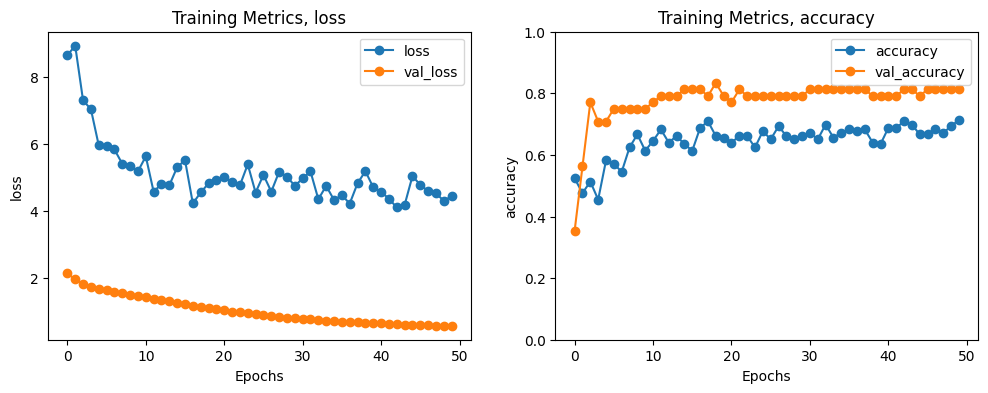

In [25]:
import matplotlib.pyplot as plt

def plot_metrics(history, title="Training Metrics"):
    df_history = pd.DataFrame(history.history)
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(y=metric, xlabel="Epochs",
                        ylabel=metric[0], title=f"{title}, {metric[0]}",
                        ylim=(0, 1) if "accuracy" in metric else None,
                        ax=ax, style="-o")

# Plot metrics
plot_metrics(history)
